In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters calculation from the experiment

In [30]:
size=[8.7/100,13/100,14.5/100]
initial_position={}
initial_position['x']=0
initial_position['y']=0
initial_position['z']=6.7/100
a=0.1/100

In [5]:
#calculate center of the cube
def split_cube(a,size,initial_position):
    number=size[0]*size[1]*size[2]/a**3
    blocks=[]
    for i in range(int(size[0]/a)):
        for j in range(int(size[1]/a)):
            for k in range(int(size[2]/a)):
                position={}
                position['x']=i*a+a/2+initial_position['x']
                position['y']=j*a+a/2+initial_position['y']
                position['z']=k*a+a/2+initial_position['z']
                blocks.append(position)
    return blocks

blocks=split_cube(a,size,initial_position)

In [6]:
position={}
position['x']=(1.9+8.7*0.6)/100
position['y']=6.5*0.6/100
position['z']=13.5*0.6/100

In [7]:
density=10/(size[0]*size[1]*size[2])
density

6097.746882526907

In [28]:
def distance(a,b):
    return abs(a-b)
def calculate_k(blocks,position,density,a):
    res=0
    for i in range(len(blocks)):
        res+=density*((a)**3)*(distance(blocks[i]['x'],position['x']))/(distance(blocks[i]['x'],position['x'])**2+distance(blocks[i]['y'],position['y'])**2+distance(blocks[i]['z'],position['z'])**2)**1.5
    return res

In [31]:
k=calculate_k(blocks,position,density,a)  #kg/m^2

# Fit the curve with data to get w and A

## Second data


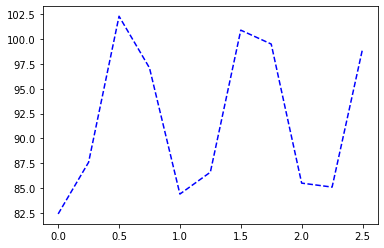

In [9]:
### fit data 
values=[82.4,87.6,102.3,97.1,84.4,86.6,100.9,99.5,85.5,85.1,99]##data collected every 1min
plt.plot(np.arange(len(values))/4,np.array(values), 'b--')
plt.show()

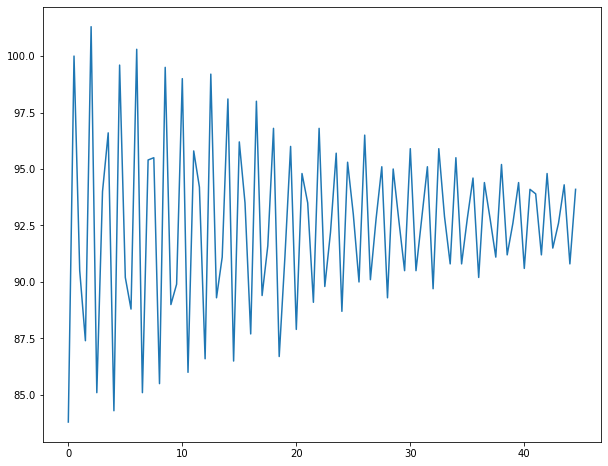

In [10]:
values2=[83.8,100,90.5,87.4,101.3,85.1,94,96.6,84.3,99.6,90.2,88.8,100.3,85.1,95.4,95.5,85.5,99.5,89,89.9,99,86,95.8,
        94.2,86.6,99.2,89.3,91.1,98.1,86.5,96.2,93.5,87.7,98,89.4,91.6,96.8,86.7,91.1,96,87.9,94.8,93.5,89.1,96.8,
        89.8,92.2,95.7,88.7,95.3,93,90,96.5,90.1,92.8,95.1,89.3,95,92.7,90.5,95.9,90.5,92.8,95.1,89.7,95.9,92.9,90.8,
        95.5,90.8,92.8,94.6,90.2,94.4,92.8,91.1,95.2,91.2,92.6,94.4,90.6,94.1,93.9,91.2,94.8,91.5,92.6,94.3,90.8,94.1] ##data collected every 30s

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(values2))/2,np.array(values2))
plt.show()

In [11]:
np.mean(values),np.mean(values2)

(91.85454545454546, 92.56111111111112)

In [12]:
def a(x,s0,A,Td,w,b):
    return s0+A*np.exp(-x/Td)*np.cos(2*np.pi*w*x+b)
xdata=np.hstack((np.arange(len(values))+1,np.arange(len(values2))/2+11.5))
v=np.hstack((np.array(values),np.array(values2)))
xdata,v

(array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. ,
        11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
        17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
        22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
        28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
        33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
        39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
        44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
        50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. ,
        55.5, 56. ]),
 array([ 82.4,  87.6, 102.3,  97.1,  84.4,  86.6, 100.9,  99.5,  85.5,
         85.1,  99. ,  83.8, 100. ,  90.5,  87.4, 101.3,  85.1,  94. ,
         96.6,  84.3,  99.6,  90.2,  88.8, 100.3,  85.1,  95.4,  95.5,
         85.5,  99.5,  89. ,  89.9,  99. ,  86. ,  95.8,  94.2,  86.6,
         99.2,  89.3,  91.1,

In [13]:
popt,pcov = curve_fit(a, xdata, v,p0=[92.5,5,20,1.25,0])
popt,pcov

(array([92.61486633, 13.05016646, 30.05585182,  1.2486217 ,  0.81491533]),
 array([[ 1.65078258e-02,  4.49364313e-03, -1.16554631e-02,
          5.99211982e-07, -1.06068859e-04],
        [ 4.49364313e-03,  4.55675693e-01, -1.20198425e+00,
          1.41507935e-05, -2.37032912e-03],
        [-1.16554631e-02, -1.20198425e+00,  4.82626071e+00,
         -3.71816694e-05,  6.17181774e-03],
        [ 5.99211982e-07,  1.41507935e-05, -3.71816694e-05,
          1.53430881e-07, -1.67164855e-05],
        [-1.06068859e-04, -2.37032912e-03,  6.17181774e-03,
         -1.67164855e-05,  2.76292387e-03]]))

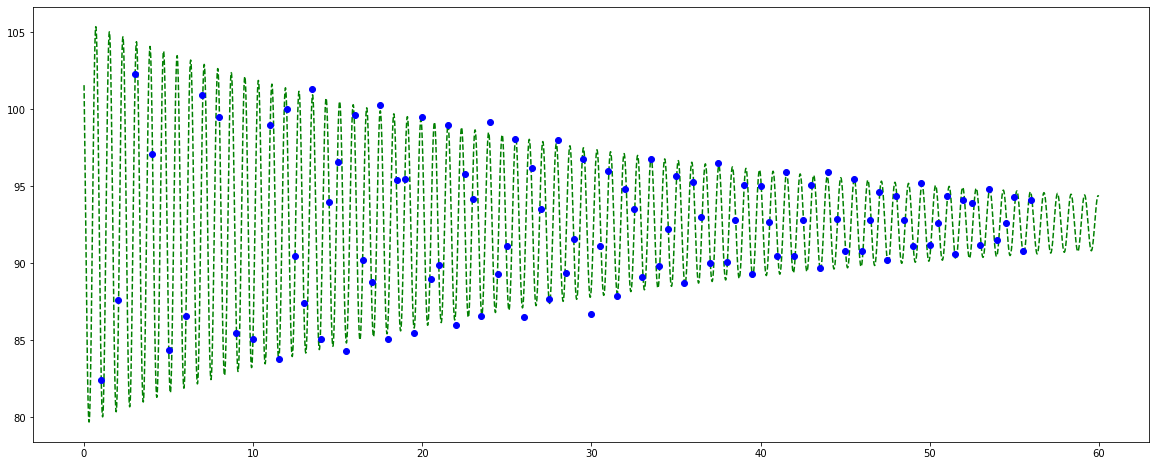

In [14]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(6000)/100, a(np.arange(6000)/100, *popt), 'g--',xdata,v, 'bo')
plt.show()

In [15]:
pred=a(xdata,*popt)
diff=pred-v
np.sum(diff**2)/diff.shape[0]

1.5802532179558078

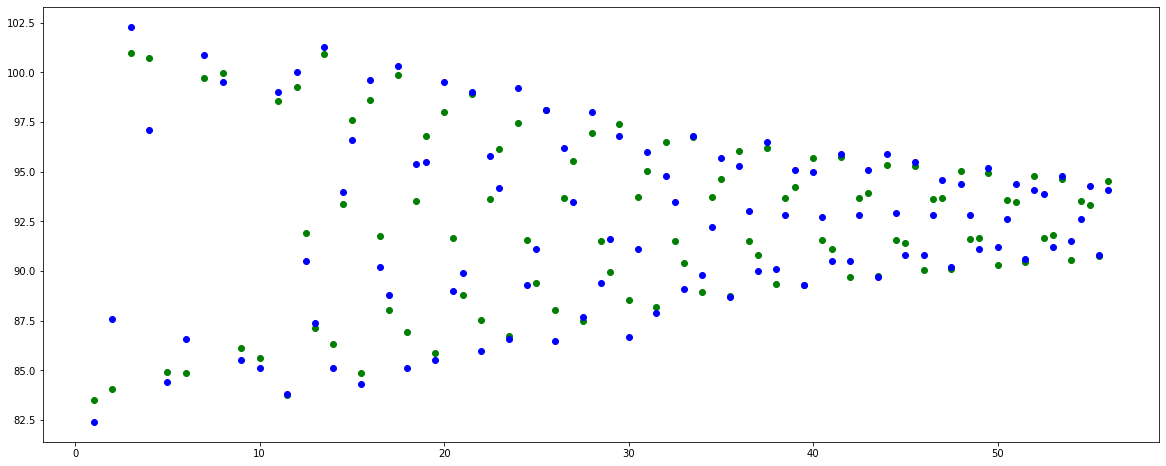

In [16]:
plt.figure(figsize=(20,8))
plt.plot(xdata, a(xdata, *popt), 'go',xdata,v, 'bo')
plt.show()

## Third data

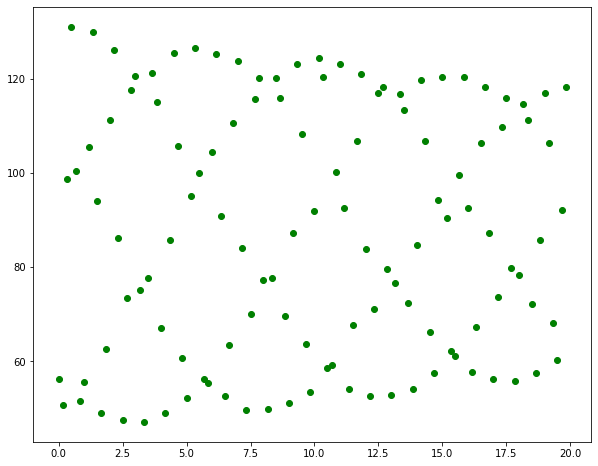

In [17]:
# results of the third experiment
#87 10s 433 8.5
values=[56.2,50.7,98.6,131,100.3,51.6,55.5,105.4,129.9,94,49.1,62.5,111.2,126.1,86.2,47.5,73.4,117.6,120.5,75.2,47.1,
       77.6,121.2,115.1,67,49.1,85.8,125.4,105.6,60.7,52.1,95.1,126.4,100,56.2,55.4,104.4,125.3,90.9,52.7,63.5,110.6,
       123.7,84.1,49.6,70.1,115.6,120.1,77.2,49.9,77.7,120.1,115.9,69.7,51.1,87.2,123.1,108.3,63.6,53.4,91.8,124.3,120.3,
       58.5,59.1,100.1,123,92.6,54.2,67.6,106.8,121,83.8,52.6,71.1,116.9,118.1,79.5,52.8,76.7,116.8,113.4,72.3,54.2,
       84.7,119.7,106.8,66.3,57.5,94.2,120.4,90.4,62.1,61.1,99.6,120.3,92.6,57.8,67.3,106.3,118.2,87.2,56.2,73.6,109.7,
       115.8,79.7,55.8,78.2,114.5,111.2,72.2,57.4,85.8,116.9,106.3,68.1,60.3,92.1,118.1]

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(values))/6,np.array(values),'go')
plt.show()

In [18]:
np.mean(values)

87.51666666666667

In [19]:
popt, pcov = curve_fit(a, np.arange(len(values))/6, np.array(values),p0=[87.5,35,30,1.25,0.5*np.pi])
popt,pcov

(array([87.70777063, 43.02477366, 59.77575947,  1.24073707,  2.32739222]),
 array([[ 4.44470758e-02,  3.39364424e-03, -2.68670930e-02,
         -5.59901628e-07,  1.63155301e-05],
        [ 3.39364424e-03,  4.08192504e-01, -2.70062552e+00,
          2.86556879e-06, -2.06248258e-04],
        [-2.68670930e-02, -2.70062552e+00,  2.53982995e+01,
         -2.25596789e-05,  1.49980967e-03],
        [-5.59901628e-07,  2.86556879e-06, -2.25596789e-05,
          5.16872105e-08, -2.85530585e-06],
        [ 1.63155301e-05, -2.06248258e-04,  1.49980967e-03,
         -2.85530585e-06,  2.23622218e-04]]))

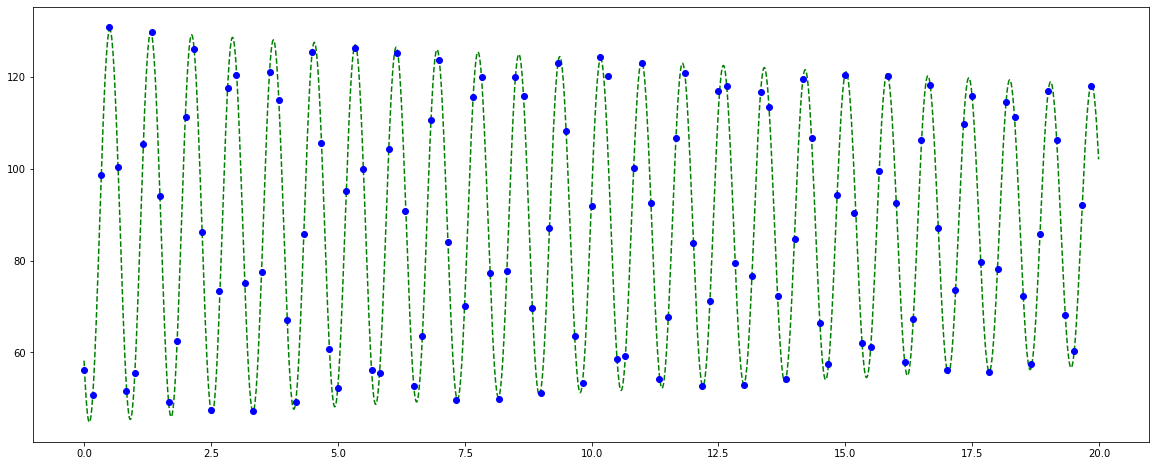

In [20]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(2000)/100, a(np.arange(2000)/100, *popt), 'g--',np.arange(len(values))/6,np.array(values), 'bo')
plt.show()

In [21]:
pred=a(np.arange(len(values))/6,*popt)
diff=pred-np.array(values)
np.sum(diff**2)/diff.shape[0]

5.106753099361712

# Calculate G for the third experiment

In [44]:
k=calculate_k(blocks,position,density,a)  #kg/m^2
w=1.25*2*np.pi/60 #rad/s
I=2*0.1*(0.3)**2 #kg*m^2
kappa=w**2*I  #kg*m^2/s^2
theta=2.29/5/2/2/100  #rad
l=0.3  #m
G=kappa*theta/(0.1*k*2*l) #kg*m^2/s^2 *rad /kg/kg*m^2/m=/kg/s^2*m^3
G

3.439287116327285e-09